This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Warning message in install.packages("qtl"):
"'lib = "C:/Program Files/R/R-3.6.1/library"' is not writable"


ERROR: Error in install.packages("qtl"): unable to install packages


In [1]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [7]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  26


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


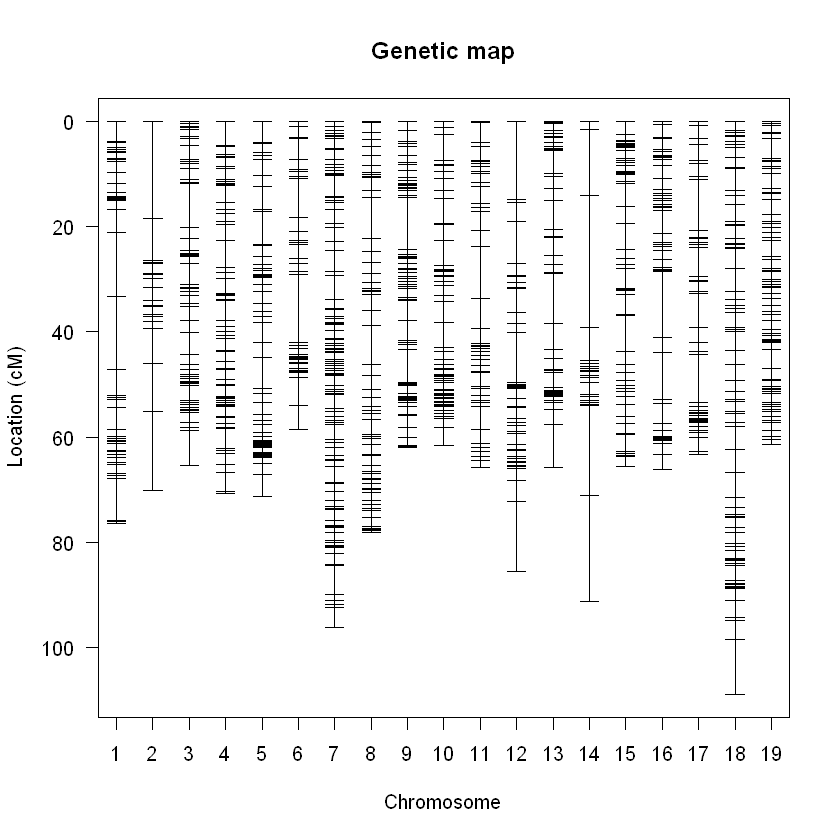

In [8]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

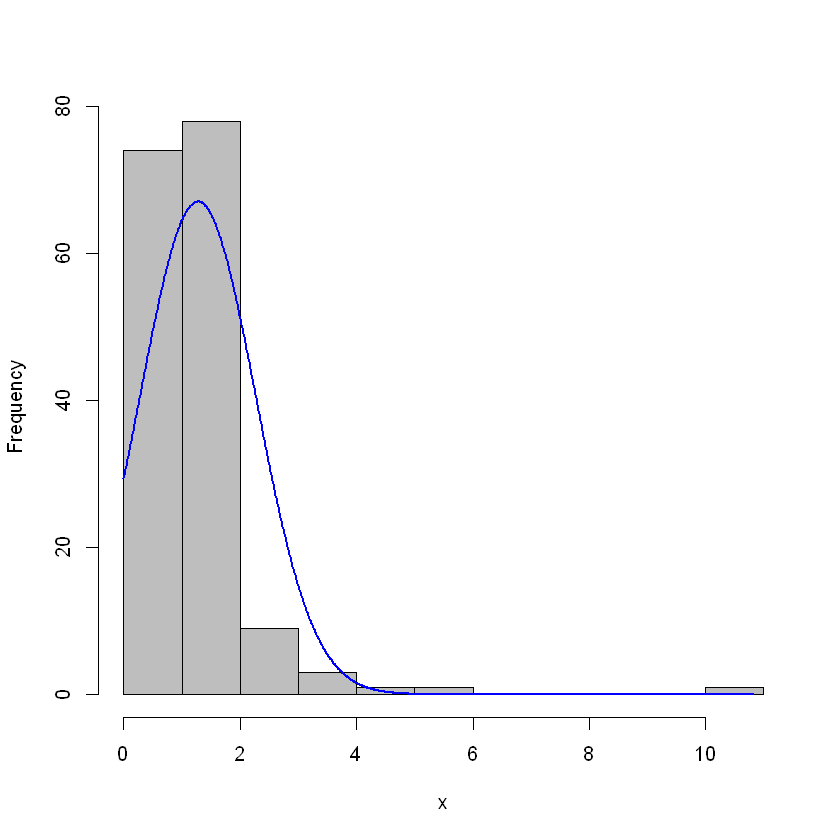

In [9]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"


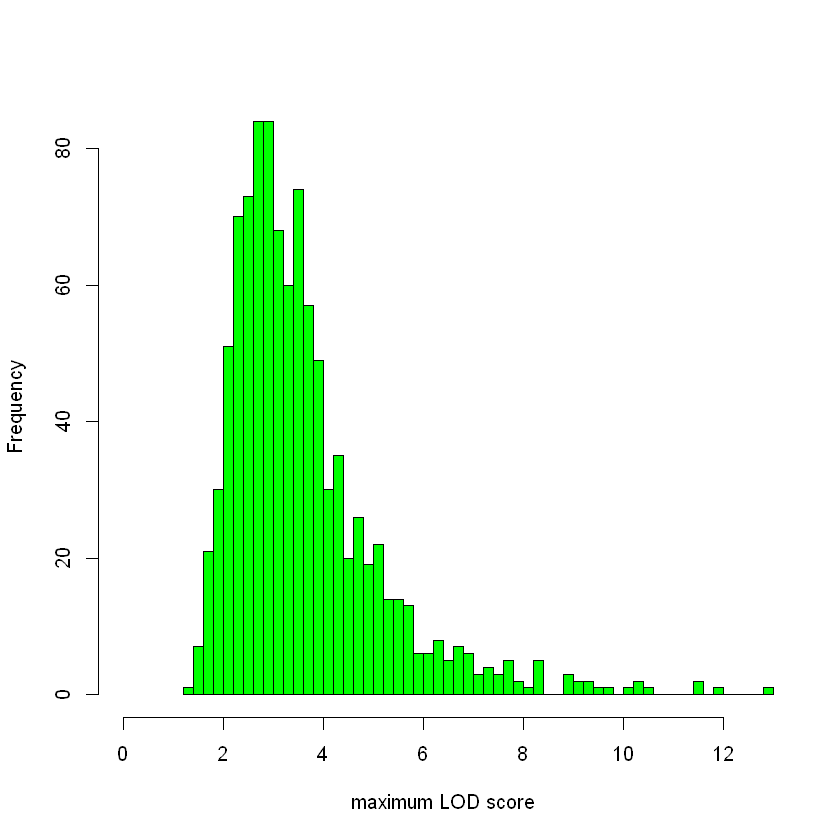

In [14]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
7_7311056,1,33.364022,0.9168895
2_5186881,2,46.031020,0.3663421
c3.loc33,3,33.000000,1.4682554
4_22218751,4,66.687063,2.3007318
5_7648545,5,37.038025,0.8025015
6_17440350,6,42.052019,1.6766309
7_2682789,7,8.753014,0.8575902
c8.loc60,8,60.000000,1.2654495
9_13407438,9,50.029053,1.0550213


LOD thresholds (1000 permutations)
   [,1]
5% 6.08
1% 9.43

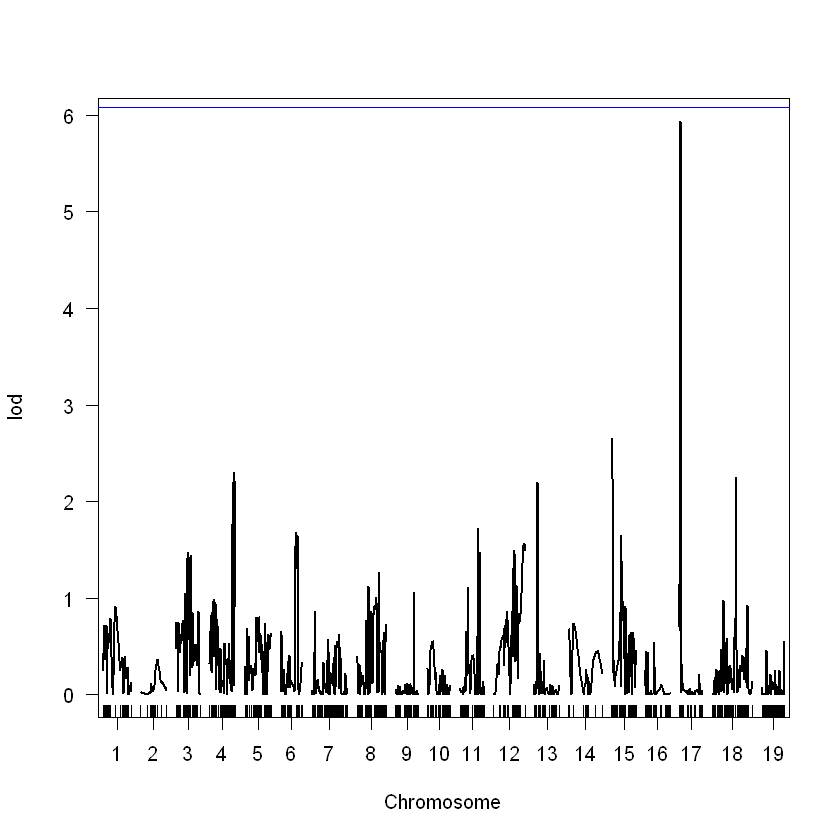

In [13]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
summary(TraitCIM1000,alpha=c(.05,.01))

Chromosome?  19
Would you like to investigate 
                  another chromosome? (Y/N):  N


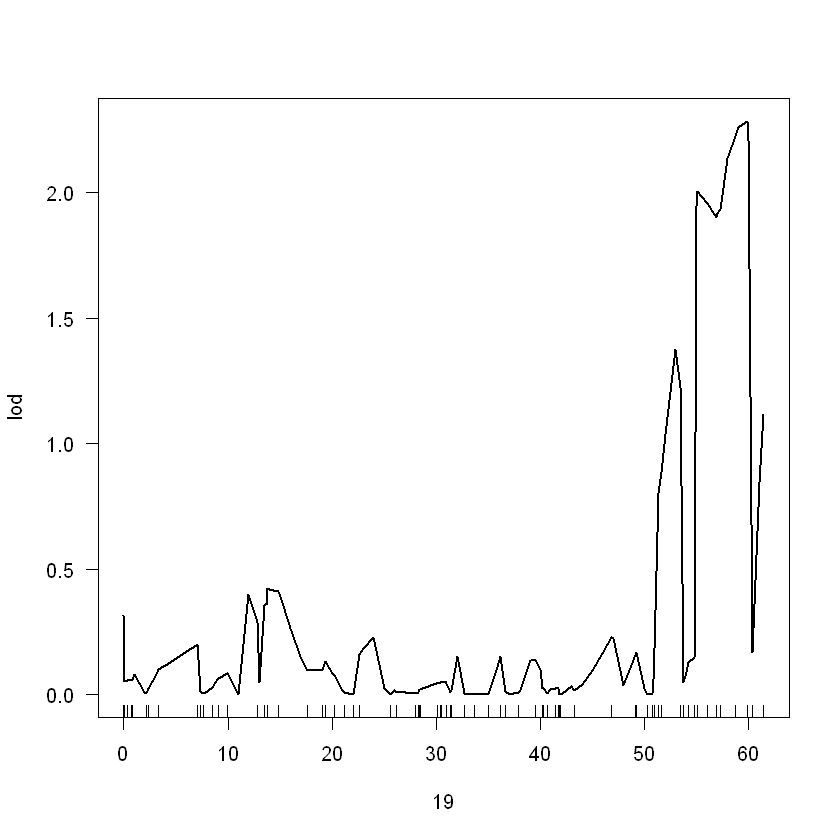

In [7]:
#Chromosomal Analysis
cont = 'Y' #Run loop on first run through
while(cont == 'Y'){
  chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
  plot(TraitCIM, chr = chr, xlab= chr) #Plot chr LOD scores
  abline(h = LOD5, col = "blue") #Statistically Significant
  cont = readline("Would you like to investigate 
                  another chromosome? (Y/N): ") #Y if multiple
                  #chromosomes are to be investigated
}

In [8]:
#change to chromosome of interest below:
bayesint(TraitCIM, chr = 19) #calculate bayesian interval
lodint(TraitCIM, chr = 19) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
19_276443,19,0.00000,0.3141722
19_23864743,19,59.92908,2.2836045
15_6360233,19,61.47008,1.1145153


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c19.loc51,19,51.00000,0.1856489
19_23864743,19,59.92908,2.2836045
15_6360233,19,61.47008,1.1145153


In [9]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  59.92


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 127 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 167 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df         SS        MS      LOD     %var Pvalue(Chi2)   Pvalue(F)
Model   1   7.276387 7.2763870 1.609957 4.342489   0.00647137 0.006882988
Error 165 160.286184 0.9714314                                           
Total 166 167.562571                                                     


Estimated effects:
-----------------
              est      SE      t
Intercept 4.40361 0.07639 57.648
19@59.9   0.42061 0.15368  2.737


In [10]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  30


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


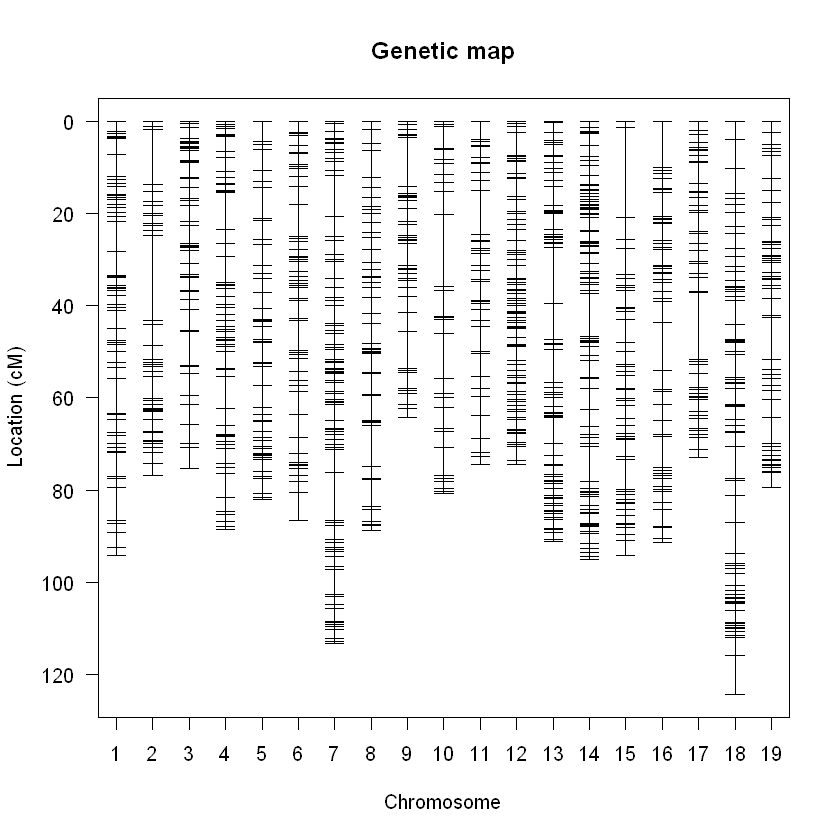

In [11]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

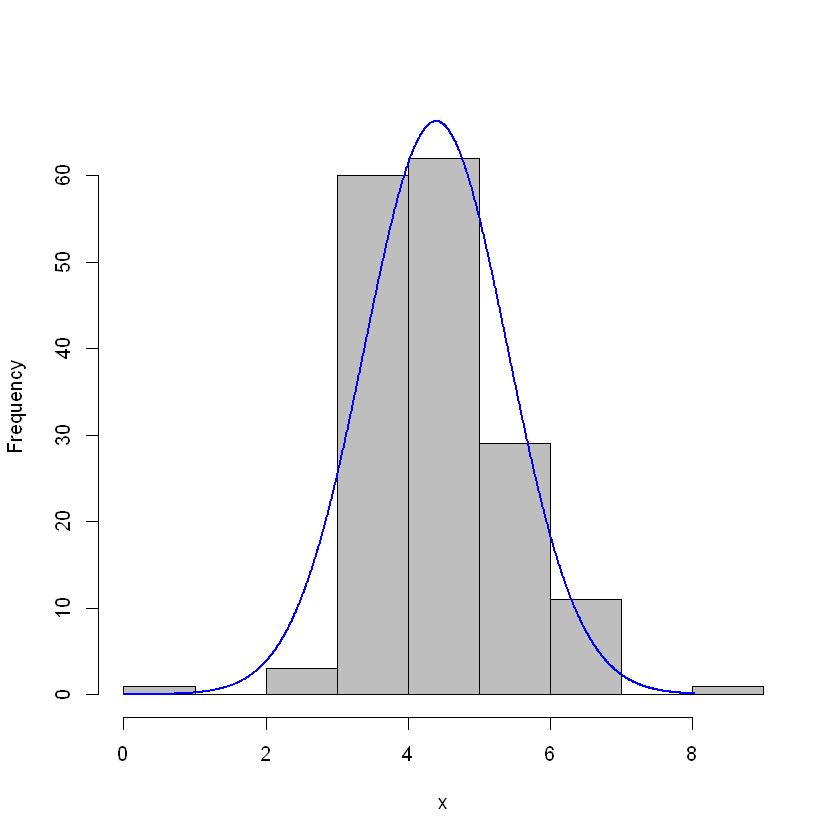

In [12]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

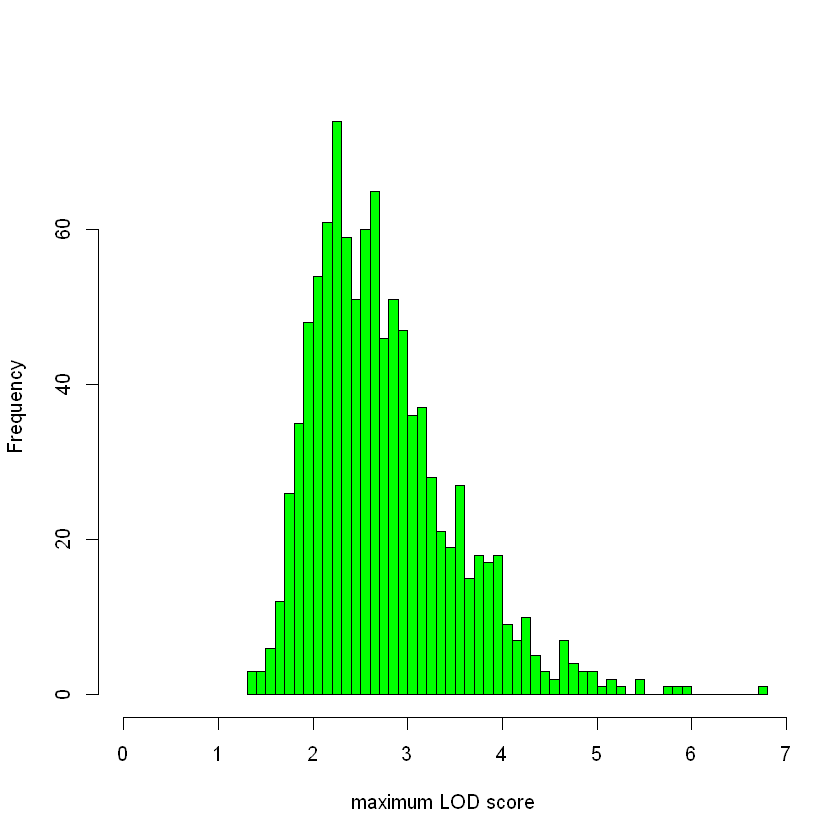

In [13]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
13_14783587,1,94.10106,3.0243688
2_4272908,2,20.03701,1.4691876
c3.loc49,3,49.00000,1.6584431
4_7599187,4,35.68002,0.3384791
18_30393961,5,21.53601,1.9761381
c6.loc58,6,58.00000,2.9800243
c7.loc56,7,56.00000,2.3160516
c8.loc62,8,62.00000,0.6221349
c9.loc56,9,56.00000,0.2436523


LOD thresholds (1000 permutations)
   [,1]
5% 4.15
1% 4.95

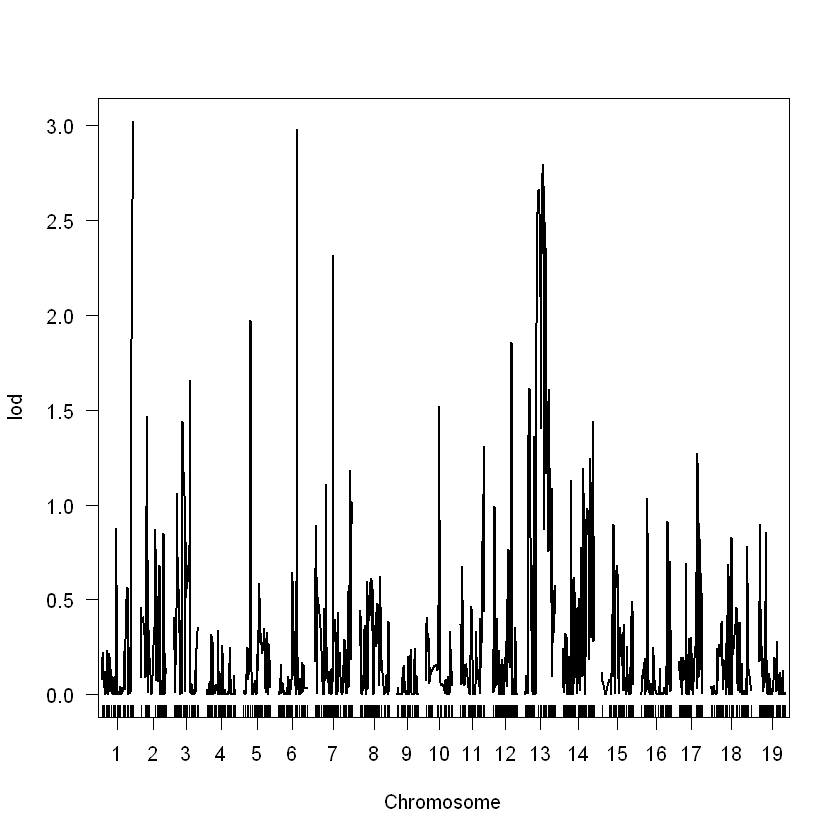

In [14]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
summary(TraitCIM1000,alpha=c(.05,.01))

Chromosome?  1
Would you like to investigate 
                  another chromosome? (Y/N):  N


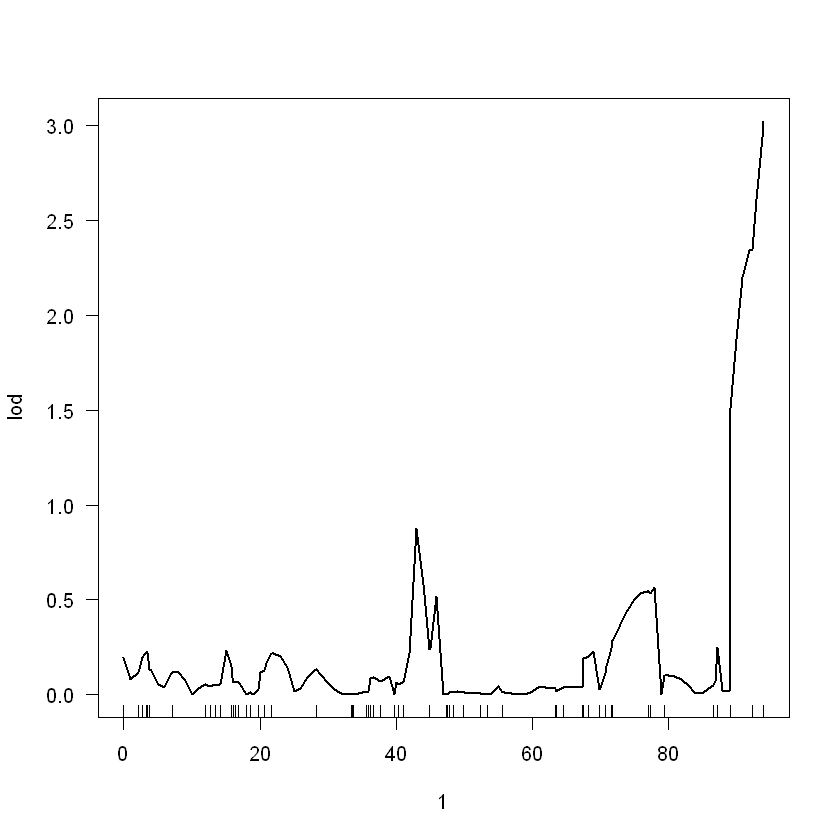

In [15]:
#Chromosomal Analysis
cont = 'Y' #Run loop on first run through
while(cont == 'Y'){
  chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
  plot(TraitCIM, chr = chr, xlab=chr) #Plot chr LOD scores
  abline(h = LOD5, col = "blue") #Statistically Significant
  cont = readline("Would you like to investigate 
                  another chromosome? (Y/N): ") #Y if multiple
                  #chromosomes are to be investigated
}